In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
loc_dataset = "./dataset/daily-bike-share.csv"
data = pd.read_csv(loc_dataset, delimiter=',', engine='python')
data

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,12,2012,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,28,12,2012,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,29,12,2012,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,30,12,2012,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [18]:
X = np.array(data['temp']).reshape(-1,1)
y = np.array(data['rentals'])
print(f"Training Shape: {X.shape}")
print(f"Testing Shape: {y.shape}")

Training Shape: (731, 1)
Testing Shape: (731,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Text(0, 0.5, 'Rentals Bike')

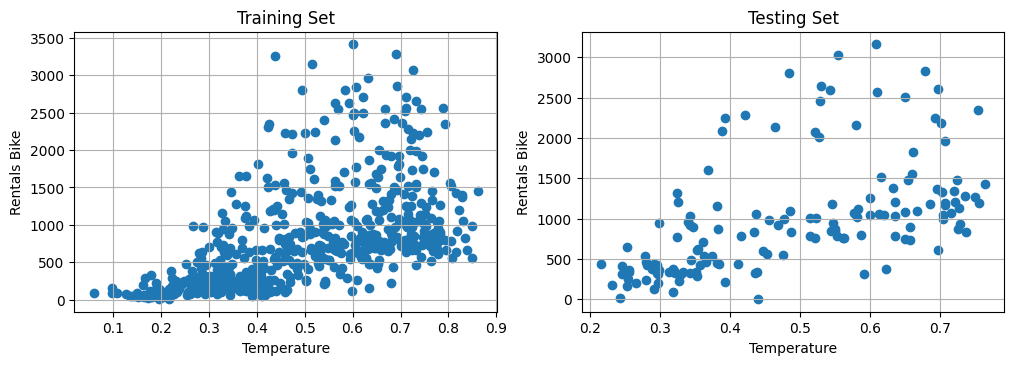

In [24]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Training Set')
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Rentals Bike')

plt.subplot(2,2,2)
plt.title('Testing Set')
plt.scatter(X_test, y_test)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Rentals Bike')


In [25]:
model = LinearRegression().fit(X_train, y_train)
intercept = model.intercept_
coef = model.coef_[0]
print(f"Intercept: {intercept:.2f}")
print(f"Coef: {coef:.2f}")

Intercept: -179.96
Coef: 1990.32


### Linear Regression Formula

$$\bar{y} = 1990.32x^{(i)} - 179.96$$


In [31]:
pred = model.predict(X_test)
residuals = y_test - pred
print(f"Pred shape: {pred.shape}")
print(f"Residuals shape: {residuals.shape}")

Pred shape: (147,)
Residuals shape: (147,)


In [29]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Coefficent of Determination (R2): {r2:.2f}")

Mean Absolute Error: 391.03
Mean Squared Error: 397066.94
Root Mean Squared Error: 630.13
Coefficent of Determination (R2): 0.19


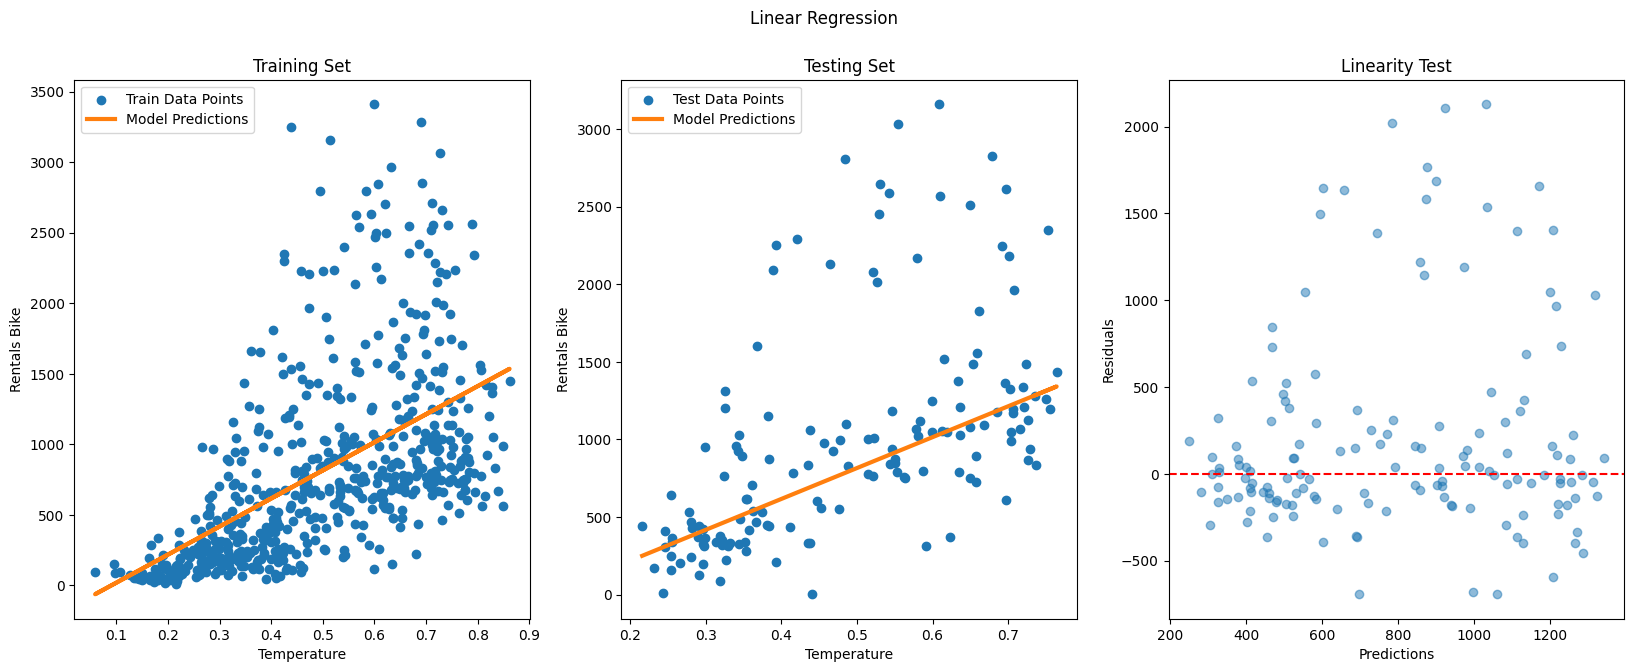

In [38]:
fig, ax = plt.subplots(ncols=3, figsize=(20,7), sharex=False, sharey=False)

ax[0].scatter(X_train, y_train, label='Train Data Points')
ax[0].plot(
    X_train,
    model.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model Predictions"
)
ax[0].set(xlabel='Temperature', ylabel='Rentals Bike', title='Training Set')
ax[0].legend()

ax[1].scatter(X_test, y_test, label='Test Data Points')
ax[1].plot(
    X_test,
    pred,
    linewidth=3,
    color="tab:orange",
    label="Model Predictions"
)
ax[1].set(xlabel='Temperature', ylabel='Rentals Bike', title='Testing Set')
ax[1].legend()

ax[2].scatter(pred, residuals, alpha=0.5)
ax[2].axhline(y=0, color='red', linestyle='--')
ax[2].set(xlabel='Predictions', ylabel='Residuals', title='Linearity Test')

fig.suptitle('Linear Regression')

plt.show()